In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy
import pickle

import sys
import os

project_path = os.path.expanduser('~/repos/metric_graph/')
sys.path.append(project_path)

from construct_graph.graph import Graph, Flat
import construct_graph
from calculations.helper_functions import style_plot
import solve_laplace_operator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
450 - 135

315

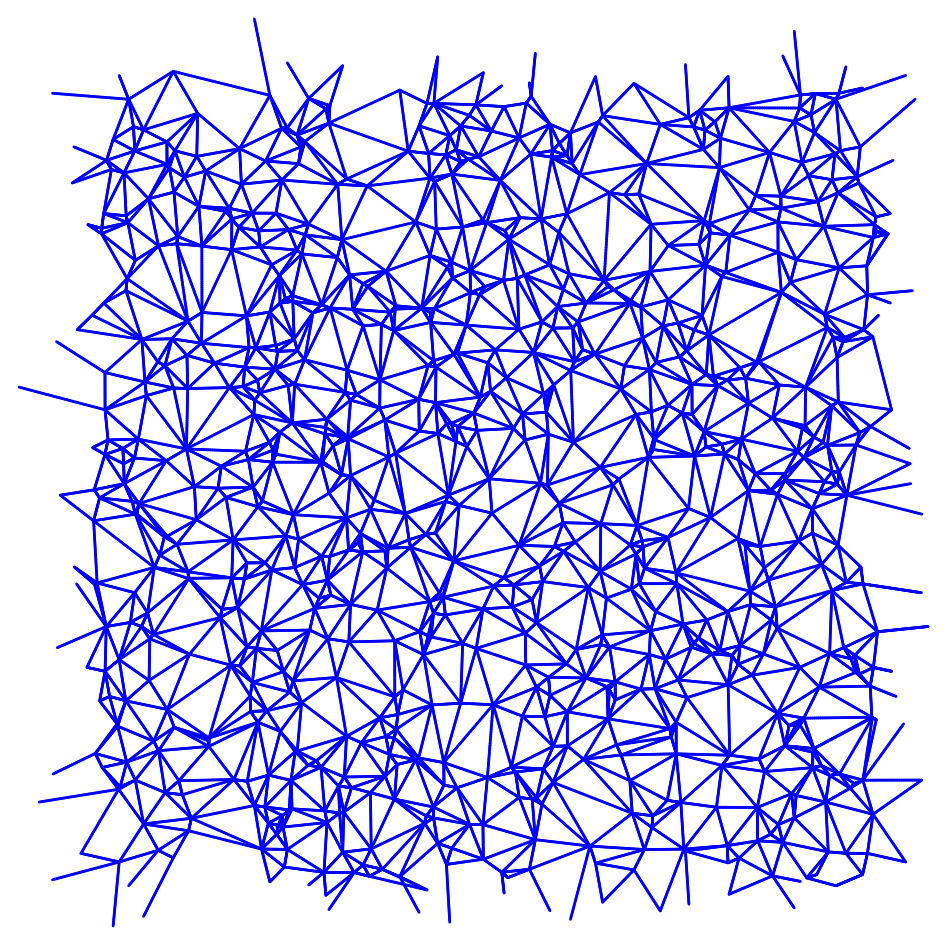

In [12]:
num_Vs = 800
seed = 0

np.random.seed(seed)
rd = construct_graph.patch_graph.Random_Delaunay(num_Vs)
g = construct_graph.patch_graph.Patch(rd)

fig, ax = g.plot_graph(return_figax=True, figsize=10, linewidth=2)

plt.savefig(f"../figures/delaunay/torus_graph.png", dpi=300, bbox_inches="tight")

In [3]:
file = open("../data/delaunay/sphere_eigenvalues/sphere_eigenvalues.pkl", "rb")
eigenvalues = pickle.load(file)
file.close()

In [2]:
file = open("../data/delaunay/torus_eigenvalues/torus_eigenvalues.pkl", "rb")
eigenvalues = pickle.load(file)
file.close()

In [55]:
np.sqrt(2) * np.pi * np.sqrt(0.9201)

4.261695204831598

In [57]:
eigenvalues[num_Vs][seed]

array([4.05199952, 4.23599831, 4.24508536, 4.33271631])

In [48]:
num_Vs = 1000
seed = 0

np.random.seed(seed)
rd = construct_graph.patch_graph.Random_Delaunay(num_Vs)
g = construct_graph.patch_graph.Patch(rd)

continuum_eigendata = solve_laplace_operator.solve_laplace_operator.Continuum_Eigendata("square_flat_torus")
proj = solve_laplace_operator.solve_laplace_operator.Projector(g, eigenvalues[num_Vs][seed], continuum_eigendata)
proj(0, 1, splittings=True)
to_do = {num_Vs: proj.data.copy()}
data = solve_laplace_operator.solve_laplace_operator.Eigendata(to_do)

In [51]:
for which in range(4):
    print(which)
    fig, ax = g.plot_graph(return_figax=True, figsize=10, eigenmode=proj.data[0, 1]['graph']['eigenfunction'][which].data, 
                        linewidth=3, background_color="black")
    
    plt.savefig(f"../figures/delaunay/torus_graph_{which}.png", dpi=300, bbox_inches="tight")

    plt.close()

In [50]:
for which in range(4):
    print(which)

    # Input data
    points = np.hstack((g.g_coords))
    values = np.hstack((proj.data[0, 1]['PDE']['eigenfunction'][which].data))

    # Create a regular grid over the unit disc
    xi = np.linspace(0, 1, 128)
    yi = np.linspace(0, 1, 128)
    grid_x, grid_y = np.meshgrid(xi, yi)

    # Interpolate the scalar field onto the grid
    grid_u = np.full(grid_x.shape, np.nan)  # Initialize with NaNs
    grid_u = scipy.interpolate.griddata(points.T, values, (grid_x, grid_y), method='cubic')

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.scatter(grid_x, grid_y, marker='s', c=grid_u, cmap="plasma")

    fig.set_facecolor("black")

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    ax.axis('off')

    plt.savefig(f"../figures/delaunay/torus_PDE_{which}.png", dpi=300, bbox_inches="tight")

    plt.close()

0
1
2
3


In [583]:
# eigenvalue_difs = {}
# eigenfunction_difs = {}

for num_Vs in eigenvalues:
    if 10001 < num_Vs < 30001:
        eigenvalue_difs[num_Vs] = []
        eigenfunction_difs[num_Vs] = []
        for seed in eigenvalues[num_Vs]:
            print(num_Vs, seed)

            np.random.seed(seed)
            rd = construct_graph.patch_graph.Random_Delaunay(num_Vs)
            g = construct_graph.patch_graph.Patch(rd)

            continuum_eigendata = solve_laplace_operator.solve_laplace_operator.Continuum_Eigendata("square_flat_torus")
            proj = solve_laplace_operator.solve_laplace_operator.Projector(g, eigenvalues[num_Vs][seed], continuum_eigendata)
            proj(0, 1)
            to_do = {num_Vs: proj.data.copy()}
            data = solve_laplace_operator.solve_laplace_operator.Eigendata(to_do)

            eigenvalue_difs[num_Vs].append(data.relative_eigenvalue_differences[0, 1])
            eigenfunction_difs[num_Vs].append(data.relative_eigenfunction_differences[0, 1])

            # g.plot_graph(figsize=6, eigenmode=proj.data[0, 1]['graph']['eigenfunction'][0].data, capstyle=None, linewidth=1)

15848 0


IndexError: list assignment index out of range

In [566]:
nums_Vs = np.array([num_Vs for num_Vs in eigenvalues if num_Vs < 10001])

means = np.array([np.mean(eigenfunction_difs[i]) for i in nums_Vs])

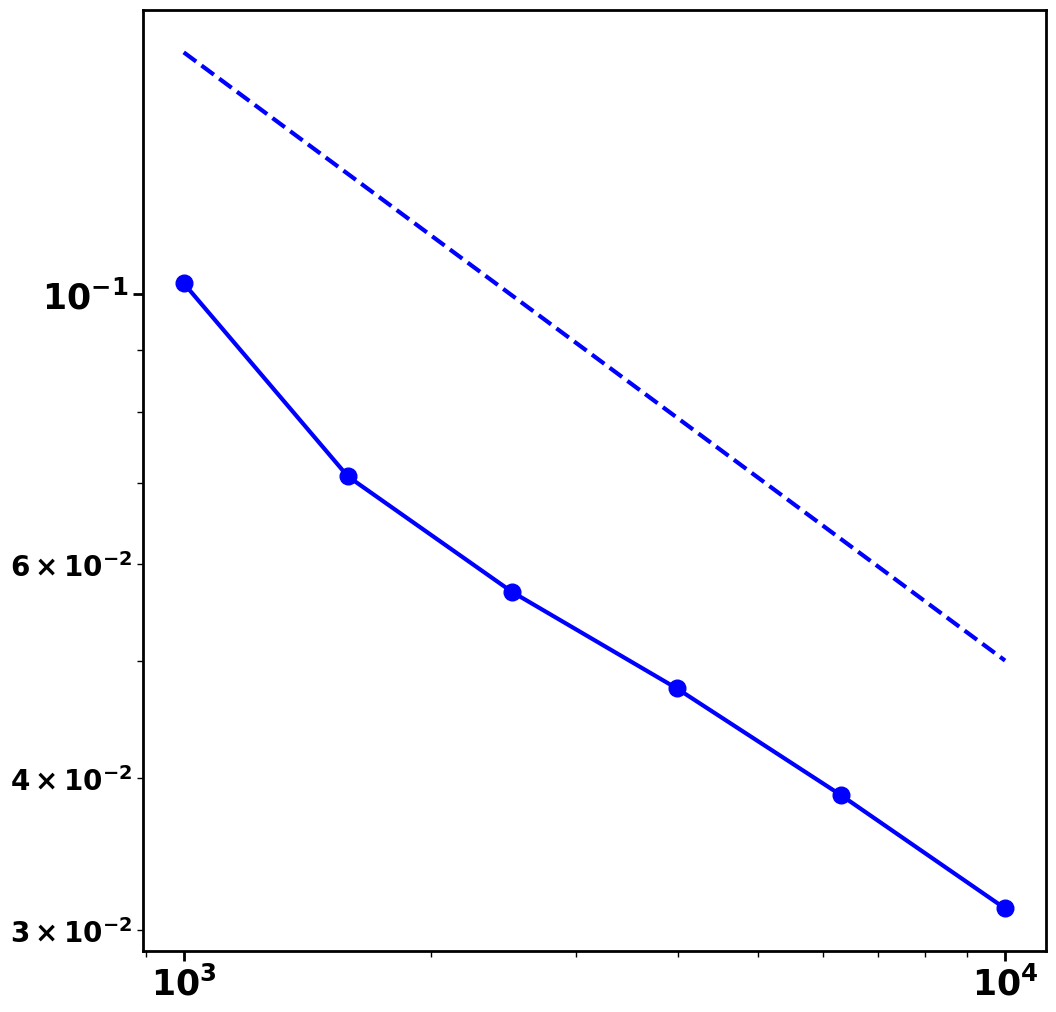

In [588]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12

ax.loglog(nums_Vs, means, 'o-', c="blue", markersize=eigenvalue_markersize, linewidth=eigenvalue_linewidth)
ax.loglog(nums_Vs, nums_Vs**(-0.5) * 5, '--', c="blue", linewidth=eigenvalue_linewidth)

style_plot(fig, ax, aspect=None)

# plt.savefig("../figures/delaunay/torus_eigenmode_convergence.pdf", dpi=300, bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12

torus_end = None
sphere_end = None
drum_end = None

ax.loglog(torus_nums_Vs[:torus_end], np.abs((torus_means[:torus_end]**2 - torus_continuum_eigenvalue)), 
          'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.loglog(sphere_nums_Vs[:sphere_end], np.abs((sphere_means[:sphere_end]**2 - sphere_continuum_eigenvalue)), 
          'o-', c='g', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.loglog(drum_nums_Vs[:drum_end], np.abs((drum_means[:drum_end]**2 - drum_continuum_eigenvalue)), 
          'o-', c='purple', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(torus_nums_Vs[:torus_end], torus_nums_Vs[:torus_end]**(-1.) * 30000, 
          '--', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(sphere_nums_Vs[:sphere_end], sphere_nums_Vs[:sphere_end]**(-1.) * 6, 
          '--', c='g', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(drum_nums_Vs[:drum_end], drum_nums_Vs[:drum_end]**(-0.5) * 30, 
          '--', c='purple', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.set_xlim([80, 520000])

style_plot(fig, ax, aspect=None)

# ax.set_ylim([1.1e-5, 9.9e1])

plt.savefig("../figures/delaunay/eigenvalue_convergence_plot.png", dpi=300, bbox_inches="tight")